Desafio:

Você faz parte da equipe de Analytics de uma grande marca de vestuário com mais de 25 lojas espalhadas em Shoppings de todo o Brasil.

Toda semana você precisa enviar para a diretoria um ranking atualizado com as 25 lojas contendo 3 informações:

    Faturamento de cada Loja
    Quantidade de Produtos Vendidos de cada Loja
    Ticket Médio dos Produto de cada Loja

Além disso, cada loja tem 1 gerente que precisa receber o resumo das informações da loja dele. Por isso, cada gerente deve receber no e-mail:

    Faturamento da sua loja
    Quantidade de Produtos Vendidos da sua loja
    Ticket Médio dos Produto da sua Loja

Esse relatório é sempre enviado como um resumo de todos os dados disponíveis no ano.


In [35]:
import pandas as pd
import sqlite3
import wget
from os.path import exists
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
if not exists('data/Vendas.csv'):
    wget.download('https://raw.githubusercontent.com/vsvale/datasets/main/Vendas.csv','data')

In [7]:
df = pd.read_csv('data/Vendas.csv')
df.head()

,Codigo_Venda,Data,ID_Loja,Produto,Quantidade,Valor_Unitario,Valor_Final
0,200805093CS607,5/9/2008 0:00,199,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
1,200805123CS567,5/12/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
2,200805143CS576,5/14/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
3,200805213CS576,5/21/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
4,200806203CS586,6/20/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0


In [8]:
con = sqlite3.connect('VendasDB.db')

In [9]:
cur = con.cursor()

In [10]:
table_fields = list(df.columns.ravel())
table_fields

/tmp/ipykernel_425/2089091235.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  table_fields = list(df.columns.ravel())


['Codigo_Venda',
 'Data',
 'ID_Loja',
 'Produto',
 'Quantidade',
 'Valor_Unitario',
 'Valor_Final']

In [11]:
table_fields = [unidecode(column).replace(" ","_") for column in table_fields]
table_fields

['Codigo_Venda',
 'Data',
 'ID_Loja',
 'Produto',
 'Quantidade',
 'Valor_Unitario',
 'Valor_Final']

In [12]:
cur.execute("""CREATE TABLE IF NOT EXISTS """+"""VENDAS"""+"""("""+','.join(table_fields)+""")""")

In [14]:
query = """INSERT INTO"""+""" VENDAS"""+"""("""+','.join(table_fields)+""") VALUES ("""+','.join(map(str,'?'*len(df.columns)))+""")"""
query

'INSERT INTO VENDAS(Codigo_Venda,Data,ID_Loja,Produto,Quantidade,Valor_Unitario,Valor_Final) VALUES (?,?,?,?,?,?,?)'

In [15]:
str_dataset = df.astype(str)

In [16]:
for i in range(len(str_dataset)):
  insert = tuple(str_dataset.iloc[i])
  cur.execute(query,insert)
con.commit()

In [17]:
df = pd.read_sql_query('SELECT * FROM VENDAS',con)

In [18]:
con.close()

In [19]:
df.head()

,Codigo_Venda,Data,ID_Loja,Produto,Quantidade,Valor_Unitario,Valor_Final
0,200805093CS607,5/9/2008 0:00,199,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
1,200805123CS567,5/12/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
2,200805143CS576,5/14/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
3,200805213CS576,5/21/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0
4,200806203CS586,6/20/2008 0:00,306,Adventure Works Laptop15.4W M1548 Red,6,758.0,4548.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codigo_Venda    904 non-null    object
 1   Data            904 non-null    object
 2   ID_Loja         904 non-null    object
 3   Produto         904 non-null    object
 4   Quantidade      904 non-null    object
 5   Valor_Unitario  904 non-null    object
 6   Valor_Final     904 non-null    object
dtypes: object(7)
memory usage: 49.6+ KB


In [22]:
df['Quantidade'] = pd.to_numeric(df['Quantidade'])
df[['Valor_Unitario','Valor_Final']] = df[['Valor_Unitario','Valor_Final']].astype(float)
df['Data'] = pd.to_datetime(df['Data'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Codigo_Venda    904 non-null    object        
 1   Data            904 non-null    datetime64[ns]
 2   ID_Loja         904 non-null    object        
 3   Produto         904 non-null    object        
 4   Quantidade      904 non-null    int64         
 5   Valor_Unitario  904 non-null    float64       
 6   Valor_Final     904 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 49.6+ KB


In [29]:
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 904 registros e 7 atributos.


In [30]:
df.describe()

,Quantidade,Valor_Unitario,Valor_Final
count,904.000000,904.000000,904.000000
mean,62.950221,742.527965,6620.139538
std,148.945964,368.589889,4319.407257
min,2.000000,9.990000,159.840000
25%,6.000000,758.000000,3920.000000
50%,9.000000,980.000000,5798.700000
75%,17.000000,998.000000,7986.000000
max,1560.000000,999.000000,29400.000000


In [31]:
df.isna().sum()

Codigo_Venda      0
Data              0
ID_Loja           0
Produto           0
Quantidade        0
Valor_Unitario    0
Valor_Final       0
dtype: int64

### Calcular o faturamento por Loja

In [24]:
loja_vf = df[['ID_Loja','Valor_Final']]
fat_loja = loja_vf.groupby('ID_Loja').sum()
fat_loja = fat_loja.sort_values(by='Valor_Final',ascending=False)
fat_loja

,Valor_Final
ID_Loja,
199,2.181104e+06
307,2.079648e+06
306,1.723854e+06


### Calcular Quantidade de produtos vendidos por loja

In [25]:
qtd_loja = df[['Quantidade','ID_Loja']].groupby('ID_Loja').sum().sort_values(by='Quantidade',ascending=False)
qtd_loja

,Quantidade
ID_Loja,
307,24573
199,20119
306,12215


### Calcular o ticket Médio dos Produtos por Loja

In [26]:
ticket_medio = (fat_loja['Valor_Final'] /qtd_loja['Quantidade']).to_frame().rename(columns={0:'Ticket_Medio'}).sort_values(by='Ticket_Medio',ascending=False)
ticket_medio

,Ticket_Medio
ID_Loja,
306,141.125961
199,108.410164
307,84.631442


In [39]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20
     

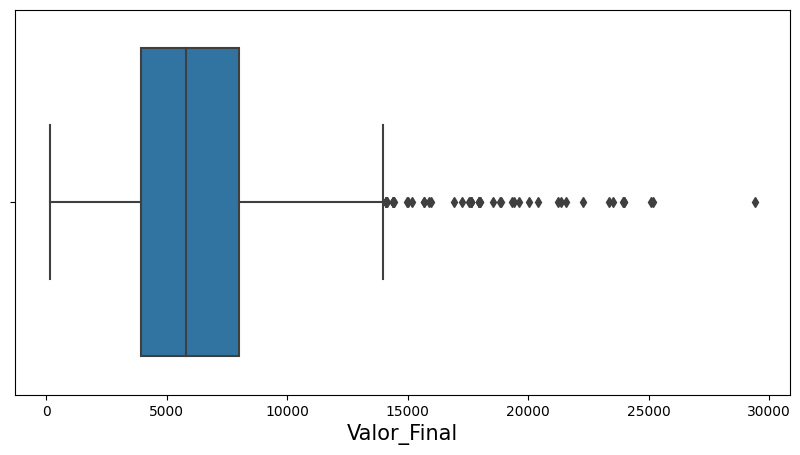

In [40]:
sns.boxplot(x = df['Valor_Final'])
plt.show()

In [43]:
df['Dayofweeksend'] = df['Data'].dt.dayofweek

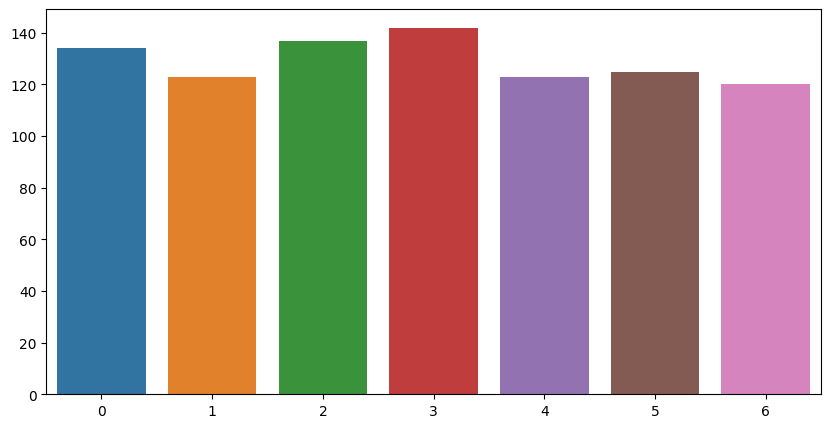

In [46]:

x = df['Dayofweeksend'].value_counts().index
y = df['Dayofweeksend'].value_counts().values
sns.barplot( x=x, y=y ) 
plt.show()

In [51]:
df = df.drop(columns=['Dayofweeksend'])

/tmp/ipykernel_425/1299480023.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="PiYG")


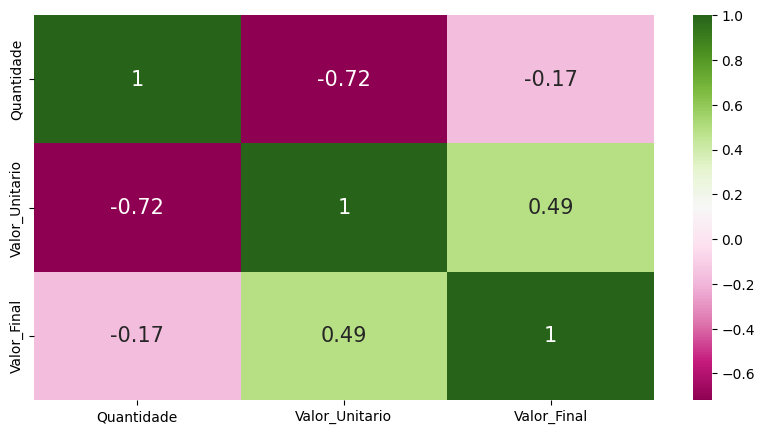

In [52]:
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

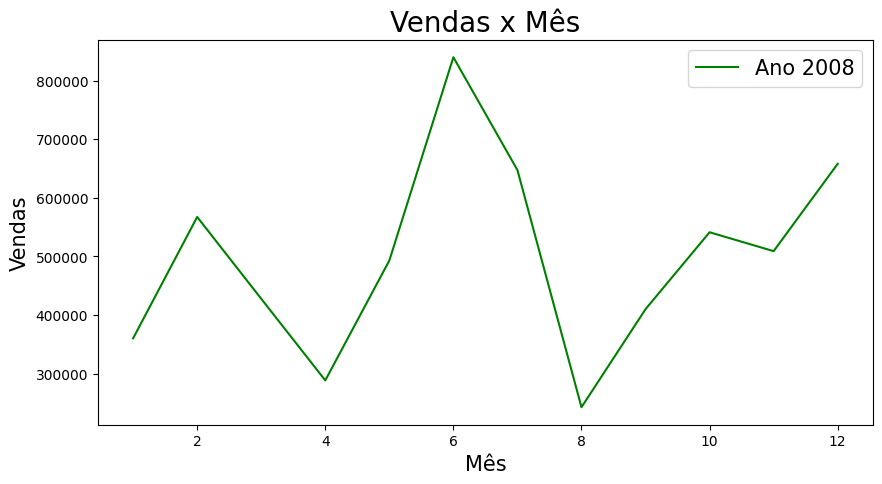

In [54]:
df.groupby(df["Data"].dt.month)["Valor_Final"].sum().plot(color='green', label='Ano 2008')
plt.title("Vendas x Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()